## Importações:

In [1]:
import numpy as np
import random as rd
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
import matplotlib.animation as animation
from itertools import combinations
from scipy.optimize import curve_fit
#from scipy.interpolate import interp1d
plt.style.use('seaborn-bright')
import pandas as pd
import math

In [2]:
from funcoes_estereoquimica import Particula, mudar_passo, gerar_particulas_dois_sistemas, simular_reacao, exponencial

# Simulando o sistema:

## Parâmetros da simulação:

In [6]:
#Parâmetros da simulação:

numero_particulas = 100
tamanho_caixa = 50
RAIO = 0.5
MASSA = 1
probabilidade_reacao = 0.7
tipo = 'atomo'

tempo_final = 50
numero_passos = 400
tempo_cada_passo = tempo_final/numero_passos

## Simulação da reação química:

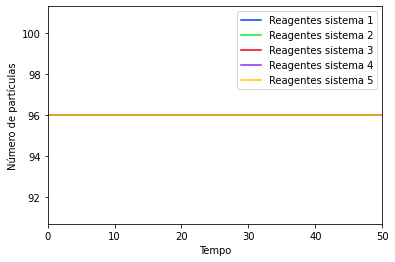

In [7]:
lista_particulas_sistema1, lista_particulas_sistema2, lista_particulas_sistema3, lista_particulas_sistema4, lista_particulas_sistema5 = gerar_particulas_dois_sistemas(numero_particulas, RAIO, MASSA, tamanho_caixa, tipo)

lista_reagentes_sistema1, lista_produtos_sistema1 = [], []
lista_reagentes_sistema2, lista_produtos_sistema2 = [], []
lista_reagentes_sistema3, lista_produtos_sistema3 = [], []
lista_reagentes_sistema4, lista_produtos_sistema4 = [], []
lista_reagentes_sistema5, lista_produtos_sistema5 = [], []

# Compute simulation (It takes some time if numero_passos and numero_particulas are large)
for i in range(numero_passos):
    
    # Simular colisões
    simular_reacao(lista_particulas_sistema1, probabilidade_reacao)

    # Atualizar posições e velocidades
    mudar_passo(lista_particulas_sistema1, tempo_cada_passo, tamanho_caixa, probabilidade_reacao)
    
    a_count, m_count = 0, 0
    
    for particula in lista_particulas_sistema1:
        if particula.tipo == 'atomo':
            a_count += 1
        else:
            m_count += 1
    
    lista_reagentes_sistema1.append(a_count)
    lista_produtos_sistema1.append(m_count)
    
    # Simular colisões para o sistema 2
    simular_reacao(lista_particulas_sistema2, probabilidade_reacao)
    # Atualizar posições e velocidades para o sistema 2
    mudar_passo(lista_particulas_sistema2, tempo_cada_passo, tamanho_caixa, probabilidade_reacao)
    
    a_count, m_count = 0, 0
    for particula in lista_particulas_sistema2:
        if particula.tipo == 'atomo':
            a_count += 1
        else:
            m_count += 1
    lista_reagentes_sistema2.append(a_count)
    lista_produtos_sistema2.append(m_count)
    
    
    # Simular colisões para o sistema 3
    simular_reacao(lista_particulas_sistema3, probabilidade_reacao)

    # Atualizar posições e velocidades
    mudar_passo(lista_particulas_sistema3, tempo_cada_passo, tamanho_caixa, probabilidade_reacao)
    
    a_count, m_count = 0, 0
    
    for particula in lista_particulas_sistema3:
        if particula.tipo == 'atomo':
            a_count += 1
        else:
            m_count += 1
    
    lista_reagentes_sistema3.append(a_count)
    lista_produtos_sistema3.append(m_count)
    
    simular_reacao(lista_particulas_sistema4, probabilidade_reacao)
    # Atualizar posições e velocidades para o sistema 4
    mudar_passo(lista_particulas_sistema4, tempo_cada_passo, tamanho_caixa, probabilidade_reacao)
    
    a_count, m_count = 0, 0
    for particula in lista_particulas_sistema4:
        if particula.tipo == 'atomo':
            a_count += 1
        else:
            m_count += 1
    lista_reagentes_sistema4.append(a_count)
    lista_produtos_sistema4.append(m_count)
    
    # Simular colisões para o sistema 5
    simular_reacao(lista_particulas_sistema5, probabilidade_reacao)

    # Atualizar posições e velocidades
    mudar_passo(lista_particulas_sistema5, tempo_cada_passo, tamanho_caixa, probabilidade_reacao)
    
    a_count, m_count = 0, 0
    
    for particula in lista_particulas_sistema5:
        if particula.tipo == 'atomo':
            a_count += 1
        else:
            m_count += 1
    
    lista_reagentes_sistema5.append(a_count)
    lista_produtos_sistema5.append(m_count)
    

plt.plot(list(range(numero_passos)),lista_reagentes_sistema1,label='Reagentes sistema 1')
plt.plot(list(range(numero_passos)),lista_reagentes_sistema2,label='Reagentes sistema 2')
plt.plot(list(range(numero_passos)),lista_reagentes_sistema3,label='Reagentes sistema 3')
plt.plot(list(range(numero_passos)),lista_reagentes_sistema4,label='Reagentes sistema 4')
plt.plot(list(range(numero_passos)),lista_reagentes_sistema5,label='Reagentes sistema 5')
plt.xlabel('Tempo')
plt.ylabel('Número de partículas')

plt.legend()
plt.xlim(0, 50)  # Define os limites do eixo x de 0 a 100
plt.savefig('Simulação_reagentes_doissistemas.png')
plt.show()

## Dataframe:

In [ ]:
lista = {'Reagentes sistema 1': lista_reagentes_sistema1, 'Reagentes sistema 2': lista_reagentes_sistema2, 'Reagentes sistema 3': lista_reagentes_sistema3, 'Reagentes sistema 4': lista_reagentes_sistema4, 'Reagentes sistema 5': lista_reagentes_sistema5, 'tempo': range(numero_passos)}

print(len(lista_reagentes_sistema1))
print(len(lista_reagentes_sistema1))
print(len(range(numero_passos)))


df = pd.DataFrame(lista)

sistema1_df = df['Reagentes sistema 1'] #df.iloc[0 : 70, 0]
sistema2_df = df['Reagentes sistema 2'] #df.iloc[0 : 70, 0]
sistema3_df = df['Reagentes sistema 3'] #df.iloc[0 : 70, 0]
sistema4_df = df['Reagentes sistema 4'] #df.iloc[0 : 70, 0]
sistema5_df = df['Reagentes sistema 5'] #df.iloc[0 : 70, 0]

temporeacao = df['tempo'] #df.iloc[0:70, 2]

df.to_csv('meu_dataframe.csv', index=False)


## Coeficiente k:

In [ ]:
import lmfit

def fit(x, k, C, D):
    return C*np.exp(-k*x) + D

taxas = []

for sistema_df in [sistema1_df, sistema2_df, sistema3_df, sistema4_df, sistema5_df]:
    
    funcao_fit_model=lmfit.Model(fit)
    funcao_fit_model.set_param_hint('D',value=30, vary=True)
    funcao_fit_model.set_param_hint('C',value=150, vary=True)
    funcao_fit_model.set_param_hint('k',value=.05, vary=True)

    param = funcao_fit_model.make_params()
    results = funcao_fit_model.fit(sistema_df, x = temporeacao, params = param)
    k = results.params['k'].value
    D = results.params['D'].value
    C = results.params['C'].value
    
    x_fit = np.linspace(0, max(temporeacao))
    y_fit = fit(x_fit, k, C, D)
    
    taxas.append(k)
    
    print('k =',k)
    plt.plot(x_fit,y_fit,label='fit')
    plt.plot(temporeacao,sistema_df,label='dados gerados')
    plt.legend()
    plt.show()

#

In [ ]:
taxas

# Análise do efeito da Temperatura no sistema:

## Obtendo a temperatura através da simulação:
Sim, você pode obter a temperatura a partir da distribuição de velocidades de Maxwell-Boltzmann. Esta distribuição descreve a probabilidade de uma partícula ter uma determinada velocidade em um gás ideal à temperatura \(T\).

A relação entre a temperatura \(T\) e a distribuição de velocidades de Maxwell-Boltzmann é dada pela equação:

$ \langle v^2 \rangle = \frac{3 k_B T}{m} $

Onde:
- $\langle v^2 \rangle$ é o valor médio da velocidade ao quadrado.
- \(k_B\) é a constante de Boltzmann $(1.380649 \times 10^{-23} \, \text{J/K}$.
- \(T\) é a temperatura em Kelvin.
- \(m\) é a massa da partícula.

Se você tiver a média das velocidades ao quadrado das partículas em sua simulação, você pode usar essa equação para encontrar a temperatura correspondente.

Por exemplo, se você tem a média das velocidades ao quadrado $\langle v^2 \rangle$ e a massa das partículas, você pode calcular a temperatura usando:

$ T = \frac{m \langle v^2 \rangle}{3 k_B} $

Lembre-se de que esta é uma estimativa baseada **nas propriedades do gás ideal e na distribuição de velocidades. Se o sistema não se comporta como um gás ideal, essa relação pode não ser precisa.**


In [ ]:
def calcular_temperatura(lista_particulas, massa):
    """
    Calcula uma estimativa da temperatura do sistema com base na distribuição de Maxwell-Boltzmann das velocidades.

    Args:
        lista_particulas (list): Uma lista de objetos que contêm informações sobre as partículas.
            Cada objeto deve ter um atributo 'velocidade' que represente a velocidade da partícula como um vetor.
        massa (float): A massa das partículas em unidades apropriadas (por exemplo, kg).

    Returns:
        float: A temperatura estimada em Kelvin.

    Note:
        Esta estimativa assume que as velocidades das partículas seguem a distribuição de Maxwell-Boltzmann
        e que o sistema se comporta como um gás ideal.
    """
    v_quadrado_medio = 0
    
    for particula in lista_particulas:
        v_quadrado_medio += np.dot(particula.velocidade, particula.velocidade)
            
    v_quadrado_medio /= len(lista_particulas)
    
    kB = 1.380649e-23  # Constante de Boltzmann em J/K
    temperatura = (massa * v_quadrado_medio) / (3 * kB)
    
    return temperatura

O código retorna a temperatura estimada de um sistema de partículas com base nas velocidades dessas partículas, assumindo que as velocidades seguem a distribuição de Maxwell-Boltzmann.

O parâmetro `lista_particulas` deve ser uma lista de objetos que contêm informações sobre as partículas. Cada objeto deve ter um atributo chamado `velocidade`, que representa a velocidade da partícula como um vetor.

A função calcula a média das velocidades ao quadrado de todas as partículas e usa essa média para estimar a temperatura do sistema. Lembre-se de que esta é uma estimativa e assume que o sistema se comporta como um gás ideal.

Para calcular a temperatura de uma partícula específica em vez da temperatura média do sistema, teria que considerar apenas a velocidade da partícula em questão.

Então para a gente obter temperaturas diferentes e inserir na equação de Arrhenius, vamos ter que usar a função `calcular_temperatura` em dois sistemas diferentes.

## Simulando sistemas diferentes:
Vamos ter que simular, pegar a lista de valores para calcular a temp e fitar para obter k.
As velocidades dos sistemas são geradas de forma aleatória dentro de `gerar_particulas()`, para gerar esses dois sistemas com velocidades diferentes

#### Massa:
Para o átomo de hidrogênio, que tem uma massa atômica de aproximadamente 1.00784 u (unidades de massa atômica), podemos converter isso para gramas por mol (g/mol) e, em seguida, para quilogramas por mol (kg/mol).

A conversão é feita da seguinte forma:

1. Massa atômica em g/mol:
$M_{\text{H}} = 1.00784 \, \text{u} \times 1 \, \text{g/mol/u} \approx 1.00784 \, \text{g/mol}$

2. Massa atômica em kg/mol:
$m_{\text{H}} = M_{\text{H}} \times 10^{-3} \times N_A \approx 1.00784 \times 10^{-3} \, \text{kg/mol} \times 6.02214076 \times 10^{23} \, \text{mol}^{-1} \approx 1.00784 \times 10^{-26} \, \text{kg/mol}$

Portanto, para o átomo de hidrogênio, a massa molecular é aproximadamente \($1 \times 10^{-26}$\) kg/mol. Se você deseja usar isso na equação de Arrhenius, certifique-se de expressar a energia de ativação (\($E_a$\)) em joules (J) por mol.


### Temperaturas:

In [ ]:
# Supondo que a reação seja de H? Massa unitária 
massa_particula = 1*10**(-26)  # Em kg/mol

# Calcular a temperatura
temperatura_sistema1 = calcular_temperatura(lista_particulas_sistema1, massa_particula)
temperatura_sistema2 = calcular_temperatura(lista_particulas_sistema2, massa_particula)
temperatura_sistema3 = calcular_temperatura(lista_particulas_sistema3, massa_particula)
temperatura_sistema4 = calcular_temperatura(lista_particulas_sistema4, massa_particula)
temperatura_sistema5 = calcular_temperatura(lista_particulas_sistema5, massa_particula)


print(f"A temperatura estimada para o sistema 1 é aproximadamente {temperatura_sistema1:.2f} K.")
print(f"A temperatura estimada para o sistema 2 é aproximadamente {temperatura_sistema2:.2f} K.")
print(f"A temperatura estimada para o sistema 3 é aproximadamente {temperatura_sistema3:.2f} K.")
print(f"A temperatura estimada para o sistema 4 é aproximadamente {temperatura_sistema4:.2f} K.")
print(f"A temperatura estimada para o sistema 5 é aproximadamente {temperatura_sistema5:.2f} K.")

temperaturas_arrhenius = [temperatura_sistema1, temperatura_sistema2, temperatura_sistema3, temperatura_sistema4, temperatura_sistema5] #tem que transformar em array?

## Equação de Arrhenius:

Beleza, então eu tenho que usar as constantes k que saem da minha simulação para colocar na equação de arrhenus e daí obter as informações do meu sistema?

Na verdade, eu simulo aumentando a velocidade (que é a mesma coisa que aumentar a temperatura) e pego esses valores e fito para obter a energia de ativação

In [ ]:
def arrhenius_eq(T, A, Ea):
    """
    Calcula a constante de taxa (k) utilizando a Lei de Arrhenius.
    
    Args:
        A (float): Fator de pré-exponencial de Arrhenius.
        Ea (float): Energia de ativação em Joules por mol.
        R (float): Constante dos gases ideais em Joules por mol por Kelvin.
        T (float): Temperatura em Kelvin.
        
    Returns:
        float: Constante de taxa (k).
    """
    R = 8.314  # Constante dos gases ideais em J/(mol K)
    
    return A * np.exp(-Ea / (R * T))

In [ ]:
temperaturas_arrhenius = np.array(temperaturas_arrhenius)

# Transformação dos dados
ln_taxas = np.log(taxas)

# Ajuste linear
params, covariance = curve_fit(arrhenius_eq, temperaturas_arrhenius, ln_taxas)
A_fit, Ea_fit = params

# Calcular os valores ajustados
valores_ajustados = arrhenius_eq(temperaturas_arrhenius, A_fit, Ea_fit)

# Imprimir os resultados
print(f"Fator de pré-exponencial (A): {A_fit}")
print(f"Energia de ativação (Ea): {Ea_fit} J/mol")

# Plotar os dados experimentais e a curva ajustada
plt.scatter(temperaturas_arrhenius, ln_taxas, color='red', label='Dados simulados')
plt.plot(temperaturas_arrhenius, valores_ajustados, color='blue', label='Ajuste de Arrhenius')
plt.xlabel('Temperatura (K)')
plt.ylabel('ln(Taxas)')
plt.legend()
plt.show()


# Análise do efeito de catalisadores no sistema:

1. Adicionar uma Classe para Catalisadores:

Atualizar a Função de Simulação:


In [ ]:
paredes = [
    Particula(MASSA, RAIO, np.array([0, TAMANHO_CAIXA / 2]), np.array([0, 0]), 'parede'),  # Parede esquerda
    Particula(MASSA, RAIO, np.array([TAMANHO_CAIXA, TAMANHO_CAIXA / 2]), np.array([0, 0]), 'parede'),  # Parede direita
    Particula(MASSA, RAIO, np.array([TAMANHO_CAIXA / 2, 0]), np.array([0, 0]), 'parede'),  # Parede inferior
    Particula(MASSA, RAIO, np.array([TAMANHO_CAIXA / 2, TAMANHO_CAIXA]), np.array([0, 0]), 'parede')  # Parede superior
]
lista_particulas.extend(paredes)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class Particula:
    def __init__(self, massa, raio, posicao, velocidade, tipo):
        self.massa = massa
        self.raio = raio
        self.posicao = posicao
        self.velocidade = velocidade
        self.tipo = tipo  # 'particula' ou 'parede'

    def checar_colisao(self, outra_particula):
        distancia = np.linalg.norm(self.posicao - outra_particula.posicao)
        return distancia < (self.raio + outra_particula.raio)

def simular_reacao(lista_particulas, probabilidade_reacao, probabilidade_reacao_parede):
    for particula in lista_particulas:
        if particula.tipo == 'particula':
            # Verificar colisão com outras partículas
            for outra_particula in lista_particulas:
                if outra_particula.tipo == 'particula' and outra_particula != particula:
                    colisao = particula.checar_colisao(outra_particula)
                    if colisao and np.random.rand() < probabilidade_reacao:
                        # Realizar reação
                        lista_particulas.remove(particula)
                        lista_particulas.remove(outra_particula)
                        break
            else:
                # Se nenhum break ocorreu, a partícula não colidiu com outra partícula,
                # então, verificar colisão com as paredes e aplicar probabilidade de reação
                if np.random.rand() < probabilidade_reacao_parede:
                    lista_particulas.remove(particula)
        elif particula.tipo == 'parede':
            # Verificar colisão com partículas e aplicar probabilidade de reação
            for outra_particula in lista_particulas:
                if outra_particula.tipo == 'particula':
                    colisao = particula.checar_colisao(outra_particula)
                    if colisao and np.random.rand() < probabilidade_reacao_parede:
                        lista_particulas.remove(outra_particula)

# Parâmetros da simulação
N = 100  # Número de partículas
RAIO = 1.0  # Raio das partículas
MASSA = 1.0  # Massa das partículas
TAMANHO_CAIXA = 50.0  # Tamanho da caixa
TIPO = 'particula'  # Tipo de partícula

# Probabilidades de reação
PROBABILIDADE_REACAO = 0.1  # Probabilidade de reação no interior do sistema
PROBABILIDADE_REACAO_PAREDE = 0.5  # Probabilidade de reação ao atingir uma parede

# Gerar partículas
lista_particulas = [Particula(MASSA, RAIO, RAIO + np.random.rand(2) * (TAMANHO_CAIXA - 2 * RAIO), np.random.rand(2) * 10, TIPO) for _ in range(N)]

# Adicionar paredes como partículas fixas na borda da caixa
paredes = [
    Particula(MASSA, RAIO, np.array([0, TAMANHO_CAIXA / 2]), np.array([0, 0]), 'parede'),  # Parede esquerda
    Particula(MASSA, RAIO, np.array([TAMANHO_CAIXA, TAMANHO_CAIXA / 2]), np.array([0, 0]), 'parede'),  # Parede direita
    Particula(MASSA, RAIO, np.array([TAMANHO_CAIXA / 2, 0]), np.array([0, 0]), 'parede'),  # Parede inferior
    Particula(MASSA, RAIO, np.array([TAMANHO_CAIXA / 2, TAMANHO_CAIXA]), np.array([0, 0]), 'parede')  # Parede superior
]
lista_particulas.extend(paredes)

# Simular a reação
simular_reacao(lista_particulas, PROBABILIDADE_REACAO, PROBABILIDADE_REACAO_PAREDE)

# Plotar as partículas
cores = ['b' if particula.tipo == 'particula' else 'r' for particula in lista_particulas]
for particula, cor in zip(lista_particulas, cores):
    plt.scatter(particula.posicao[0], particula.posicao[1], color=cor)

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Simulação com Paredes como Catalisadores')
plt.show()


In [ ]:
def simular_reacao(lista_particulas, probabilidade_reacao, probabilidade_desativacao):
    for i, particula in enumerate(lista_particulas):
        if particula.tipo == 'catalisador' and not particula.ativo:
            continue  # Ignora catalisadores desativados

        # Restante da lógica de simulação aqui

        if particula.tipo == 'reagente':
            # ...
            if probabilidade_reacao > random.uniform(0, 1):
                # Reação ocorre
                # ...
                if particula.tipo == 'catalisador':
                    # Verifica se a desativação do catalisador ocorre
                    if probabilidade_desativacao > random.uniform(0, 1):
                        particula.desativar()
                        print(f'Catalisador desativado: {i}')


Adicionar uma Probabilidade de Desativação:

In [ ]:
# Dentro do loop de simulação
probabilidade_desativacao = 0.05  # Ajuste conforme necessário
simular_reacao(lista_particulas, probabilidade_reacao, probabilidade_desativacao)


Utilize Catalisadores na Simulação:

In [ ]:
# Ao gerar as partículas
lista_particulas = gerar_particulas(N, raio, massa, tamanho_caixa, tipo)
lista_catalisadores = gerar_catalisadores(N_catalisadores, raio, massa, tamanho_caixa, tipo)
lista_particulas.extend(lista_catalisadores)


# Análise do efeito estereoquímico no sistema:
A sugestão do Amauri foi variar a probabilidade de reação e ver o impacto disso.

não muda a ordem de reação só a velocidade.)

---

## Análise do Método da Velocidade Inicial:

In [ ]:
# Vlor de K pela quantidade de partículas iniciais
# Initial rate method

In [ ]:
numero_particulas = [20, 60, 100] #, 140, 180, 200]

parametros_ajustados = []
valores_ajustados = []
valores_iniciais = []

for num_particulas in numero_particulas:
    lista_particulas = gerar_particulas(num_particulas, RAIO, MASSA, tamanho_caixa, tipo)
    lista_atomos =  []

    # Compute simulation
    for i in range(numero_passos):
        # Simular colisões
        simular_reacao(lista_particulas, probabilidade_reacao)

        # Atualizar posições e velocidades
        mudar_passo(lista_particulas, tempo_cada_passo, tamanho_caixa)

        a_count, m_count = 0, 0

        for particula in lista_particulas:
            if particula.tipo == 'atomo':
                a_count += 1

        lista_atomos.append(a_count)
       
    temporeagente = range(numero_passos)  
    atomodf = lista_atomos  
    valores_iniciais.append(atomodf)
    
    popt, _ = curve_fit(exponencial, temporeagente, atomodf)
    parametros_ajustados.append(popt)
    valores_fit_reagente = exponencial(temporeagente, *popt)
    valores_ajustados.append(valores_fit_reagente)


for i, popt in enumerate(parametros_ajustados):
    print(f"Para N = {numero_particulas[i]}, os parâmetros ajustados são: k={popt[1]}")


plt.figure(figsize=(10, 5))
for i, num_particulas in enumerate(numero_particulas):
    plt.plot(temporeagente, valores_ajustados[i], label=f'N = {num_particulas}')
    
for dados in valores_iniciais:
    plt.scatter(temporeagente, dados, s=10)

plt.xlabel('Número de partículas')
plt.ylabel('Tempo')
plt.legend()
plt.savefig('concentracaoinicial.png')
plt.show()

In [ ]:
import numpy as np

class Particula:
    def __init__(self, massa, raio, posicao, velocidade, tipo):
        self.massa = massa
        self.raio = raio
        self.posicao = posicao
        self.velocidade = velocidade
        self.tipo = tipo
        self.orientacao = self.calcular_orientacao()

    def calcular_orientacao(self):
        # Gere um vetor de orientação aleatório
        angulo_orientacao = np.random.rand(1) * 2 * np.pi
        return np.array([np.cos(angulo_orientacao), np.sin(angulo_orientacao)])

    def mover(self, dt):
        # Atualizar a posição com base na velocidade e no tempo
        self.posicao += self.velocidade * dt

    def checar_colisao(self, outra_particula):
        # Verificar colisão entre partículas (adaptar conforme necessário)
        distancia = np.linalg.norm(self.posicao - outra_particula.posicao)
        return distancia < self.raio + outra_particula.raio

def gerar_particulas(N, raio, massa, tamanho_caixa, tipo):
    lista_particulas = []

    for i in range(N):
        magnitude_velocidade = np.random.rand(1) * 25
        angulo_velocidade = np.random.rand(1) * 2 * np.pi

        v = np.array([magnitude_velocidade * np.cos(angulo_velocidade), magnitude_velocidade * np.sin(angulo_velocidade)])
        pos = raio + np.random.rand(2) * (tamanho_caixa - 2 * raio)

        nova_particula = Particula(massa, raio, pos, v, tipo)
        lista_particulas.append(nova_particula)

    return lista_particulas

# Exemplo de uso
N = 10  # Número de partículas
RAIO = 1.0
MASSA = 1.0
CAIXA_TAMANHO = 100.0

particulas = gerar_particulas(N, RAIO, MASSA, CAIXA_TAMANHO, tipo="atomo")

for particula in particulas:
    print(f"Posição: {particula.posicao}, Orientação: {particula.orientacao}")


Claro, o dot_product (produto escalar) é uma operação matemática fundamental entre dois vetores que produz um único número. No contexto de vetores, o produto escalar nos dá uma medida da "similaridade" ou "alinhamento" entre os vetores.